# AI Solicitor: SMS Spam Detection

In [1]:
! pip install torch tensorflow keras

In [3]:
! pip install matplotlib

  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----------------------------- ---------- 6.0/8.1 MB 31.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 25.9 MB/s  0:00:00
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 21.8 MB/s  0:00:00
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)

   ---------------------------------------- 0/6 [pyparsing]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]


In [29]:
! pip install nltk

  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 31.9 MB/s  0:00:00
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------

In [36]:
! pip install scikit-learn

  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl (8.7 MB)
Using cached scipy-1.16.2-cp313-cp313-win_amd64.whl (38.5 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- ------------------

In [44]:
! pip install imblearn


   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imblearn]



In [66]:
! pip install wordcloud

In [80]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


# Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exploratory data Analysis

### High Level Data Inspection

In [23]:
dataset1 = pd.read_csv("Datasets\spam (1).csv", encoding='latin1')
dataset1.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\bdcalling123\AppData\Local\Temp\ipykernel_1396\713980814.py:1: SyntaxWarning: invalid escape sequence '\s'
  dataset1 = pd.read_csv("Datasets\spam (1).csv", encoding='latin1')


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [38]:
dataset1.shape

(5572, 6)

In [39]:
# delete unnecessary columns
dataset1 = dataset1.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
dataset1.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


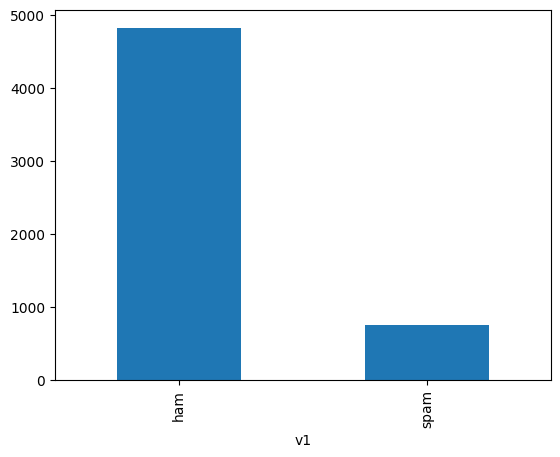

In [25]:
# class distribution analysis
dataset1['v1'].value_counts().plot(kind='bar')
plt.show()

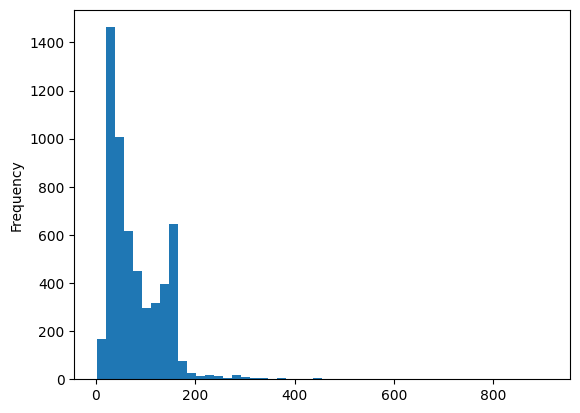

In [27]:
# MSG length analysis
dataset1['length'] = dataset1['v2'].apply(len)
dataset1['length'].plot(bins=50, kind='hist')
plt.show()

In [40]:
# handle missing values
dataset1.isnull().sum()

v1        0
v2        0
length    0
dtype: int64

In [42]:
# examine data types
dataset1.dtypes

v1        object
v2        object
length     int64
dtype: object

In [45]:
# use SMOTE to handle class imbalance
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
X = dataset1['v2']
y = dataset1['v1']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_vec, y_train)
model = MultinomialNB()
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9730941704035875


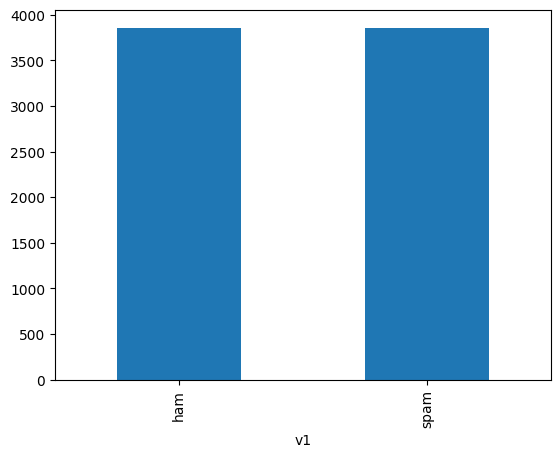

In [49]:
# analyzing the class distribution afetr SMOTE
y_train_res.value_counts().plot(kind='bar')
plt.show()

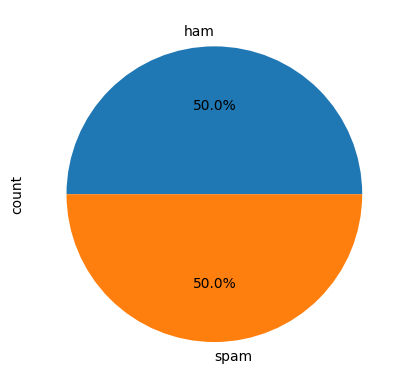

In [50]:
# class distribution pie chart
y_train_res.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [51]:
#  Print out a few examples of both spam and ham messages to get a qualitative sense of the differences in their content.
print("Spam Messages:")
print(dataset1[dataset1['v1'] == 'spam']['v2'].sample(5, random_state=42))
print("\nHam Messages:")
print(dataset1[dataset1['v1'] == 'ham']['v2'].sample(5, random_state=42))

Spam Messages:
1455    Summers finally here! Fancy a chat or flirt wi...
1852    This is the 2nd time we have tried 2 contact u...
672     Get ur 1st RINGTONE FREE NOW! Reply to this ms...
946     Ur cash-balance is currently 500 pounds - to m...
2879    Last Chance! Claim ur å£150 worth of discount ...
Name: v2, dtype: object

Ham Messages:
3714    I am late,so call you tomorrow morning.take ca...
1311    U r too much close to my heart. If u go away i...
548                                Wait  &lt;#&gt;  min..
1324    Can you call me plz. Your number shows out of ...
3184    MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...
Name: v2, dtype: object


### Message Length Distribution Analysis

In [54]:
# create length feature
dataset1['length'] = dataset1['v2'].apply(len)
dataset1.head(10)

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154


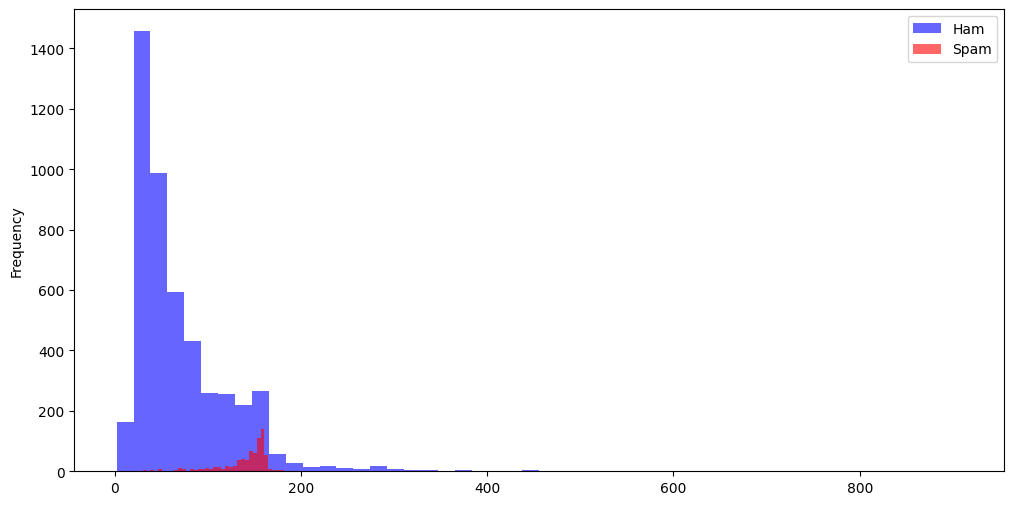

In [55]:
# comapre length distribution between spam and ham
plt.figure(figsize=(12, 6))
dataset1[dataset1['v1'] == 'ham']['length'].plot(bins=50, kind='hist', color='blue', alpha=0.6, label='Ham')
dataset1[dataset1['v1'] == 'spam']['length'].plot(bins=50, kind='hist', color='red', alpha=0.6, label='Spam')
plt.legend()

### Punctuation and spacial charecter analysis

In [64]:
# count punctuations
import string
dataset1['punctuation_count'] = dataset1['v2'].apply(lambda x: sum(1 for char in x if char in string.punctuation))
dataset1.head(10)

,v1,v2,length,punctuation_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,8
6,ham,Even my brother is not like to speak with me. ...,77,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
8,spam,WINNER!! As a valued network customer you have...,158,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2


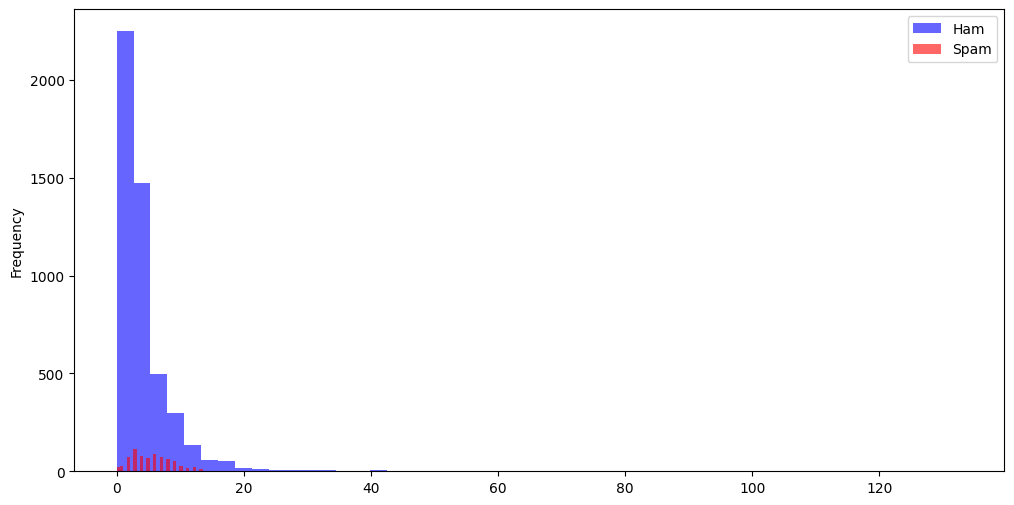

In [65]:
# compare counts per message between spam and ham
plt.figure(figsize=(12, 6))
dataset1[dataset1['v1'] == 'ham']['punctuation_count'].plot(bins=50, kind='hist', color='blue', alpha=0.6, label='Ham')
dataset1[dataset1['v1'] == 'spam']['punctuation_count'].plot(bins=50, kind='hist', color='red', alpha=0.6, label='Spam')
plt.legend()

### Word Level Analysis

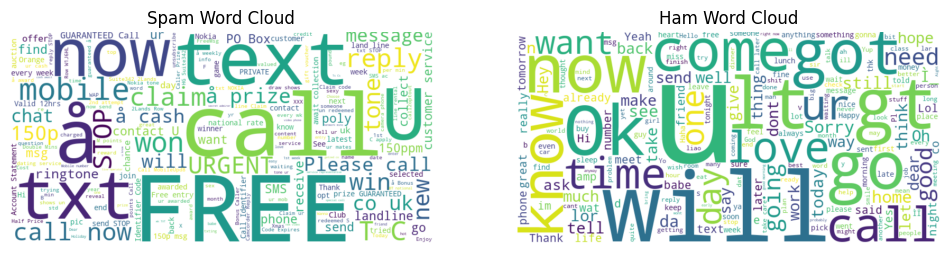

In [67]:
# create word clouds for spam and ham messages
from wordcloud import WordCloud
spam_words = ' '.join(dataset1[dataset1['v1'] == 'spam']['v2'])
ham_words = ' '.join(dataset1[dataset1['v1'] == 'ham']['v2'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)
# Display the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Word Cloud')
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Word Cloud')
plt.show()

In [70]:
# Comapre top n-grams between spam and ham messages
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]
# Comapre top n-grams between spam and ham messages
from sklearn.feature_extraction.text import CountVectorizer 
def compare_spam_ham_ngrams(spam_corpus, ham_corpus, n=None, ngram_range=(1, 1)):
    spam_ngrams = get_top_ngrams(spam_corpus, n=n, ngram_range=ngram_range)
    ham_ngrams = get_top_ngrams(ham_corpus, n=n, ngram_range=ngram_range)
    return spam_ngrams, ham_ngrams
spam_corpus = dataset1[dataset1['v1'] == 'spam']['v2']
ham_corpus = dataset1[dataset1['v1'] == 'ham']['v2']
top_n = 20
spam_ngrams, ham_ngrams = compare_spam_ham_ngrams(spam_corpus, ham_corpus, n=top_n, ngram_range=(1, 2))
print(f"Top {top_n} Spam N-grams:")
for ngram, freq in spam_ngrams:
    print(f"  {ngram}: {freq}")
print(f"Top {top_n} Ham N-grams:")
for ngram, freq in ham_ngrams:
    print(f"  {ngram}: {freq}")

Top 20 Spam N-grams:
  to: 688
  call: 355
  you: 297
  your: 264
  free: 224
  the: 206
  for: 203
  now: 199
  or: 188
  txt: 163
  is: 158
  on: 144
  ur: 144
  have: 135
  from: 131
  mobile: 127
  text: 125
  and: 122
  stop: 121
  claim: 113
Top 20 Ham N-grams:
  you: 1943
  to: 1554
  the: 1122
  and: 857
  in: 818
  me: 772
  my: 750
  is: 732
  it: 711
  that: 551
  of: 525
  for: 501
  have: 440
  can: 439
  so: 435
  but: 434
  your: 417
  not: 415
  are: 414
  on: 393


In [71]:
# analyze case usages
def analyze_case_usages(corpus):
    case_usages = {}
    for text in corpus:
        for word in text.split():
            # Count the occurrences of each word with its case
            case_usages[word] = case_usages.get(word, 0) + 1
    return case_usages
spam_case_usages = analyze_case_usages(spam_corpus)
ham_case_usages = analyze_case_usages(ham_corpus)
spam_case_usages = analyze_case_usages(spam_corpus)
ham_case_usages = analyze_case_usages(ham_corpus)
print("Spam Case Usages (sample):", dict(list(spam_case_usages.items())[:10]))
print("Ham Case Usages (sample):", dict(list(ham_case_usages.items())[:10]))

Spam Case Usages (sample): {'Free': 35, 'entry': 25, 'in': 64, '2': 169, 'a': 358, 'wkly': 10, 'comp': 9, 'to': 604, 'win': 28, 'FA': 4}
Ham Case Usages (sample): {'Go': 10, 'until': 21, 'jurong': 1, 'point,': 1, 'crazy..': 1, 'Available': 1, 'only': 102, 'in': 734, 'bugis': 4, 'n': 128}


### Numerical and URL Analysis

In [72]:
# count numerical digits
import re
dataset1['digit_count'] = dataset1['v2'].apply(lambda x: len(re.findall(r'\d', x)))
dataset1.head(10)

,v1,v2,length,punctuation_count,digit_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,0
1,ham,Ok lar... Joking wif u oni...,29,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,25
3,ham,U dun say so early hor... U c already then say...,49,6,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,8,4
6,ham,Even my brother is not like to speak with me. ...,77,2,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6,1
8,spam,WINNER!! As a valued network customer you have...,158,6,19
9,spam,Had your mobile 11 months or more? U R entitle...,154,2,13


In [78]:
# count URLs
import re
def count_urls(text):
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return len(re.findall(url_pattern, text))

dataset1['url_count'] = dataset1['v2'].apply(count_urls)
dataset1.head(60)

,v1,v2,length,punctuation_count,digit_count,url_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,0,0
1,ham,Ok lar... Joking wif u oni...,29,6,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,25,0
3,ham,U dun say so early hor... U c already then say...,49,6,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,0,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,8,4,0
6,ham,Even my brother is not like to speak with me. ...,77,2,0,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6,1,0
8,spam,WINNER!! As a valued network customer you have...,158,6,19,0
9,spam,Had your mobile 11 months or more? U R entitle...,154,2,13,0


<Axes: title={'center': 'URL Count'}, xlabel='v1', ylabel='url_count'>

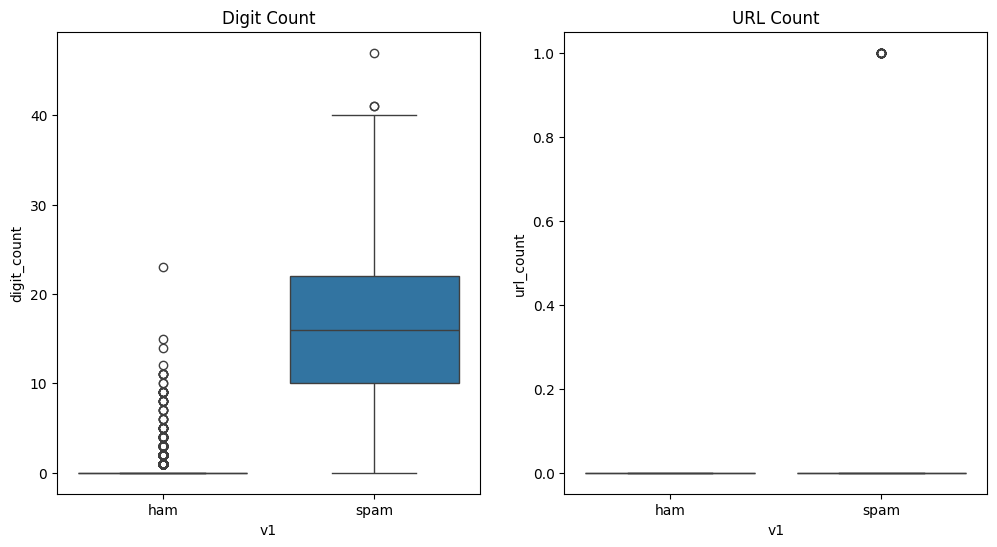

In [84]:
# compare counts per message between spam and ham
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Digit Count")
sns.boxplot(x='v1', y='digit_count', data=dataset1)
plt.subplot(1, 2, 2)
plt.title("URL Count")
sns.boxplot(x='v1', y='url_count', data=dataset1)

### Linguistic Feature Analysis

In [85]:
# analyze abbreviations and slangs
abbreviations = {
    "u": "you",
    "ur": "your",
    "btw": "by the way",
    "idk": "I don't know",
    "imo": "in my opinion",
    "brb": "be right back",
    "lol": "laughing out loud",
    "omg": "oh my god",
    "ttyl": "talk to you later",
    "thx": "thanks",
    "pls": "please",
    "gr8": "great",
    "b4": "before",
    "l8r": "later",
    "cya": "see you",
    "np": "no problem",
    "smh": "shaking my head",
    "fyi": "for your information",
    "asap": "as soon as possible",
    "tbh": "to be honest",
    "imo": "in my opinion",
    "jk": "just kidding",
    "rofl": "rolling on the floor laughing",
    "wtf": "what the fuck",
    "yolo": "you only live once",
    "bff": "best friends forever",
    "irl": "in real life",
    "dm": "direct message",
    "ftw": "for the win",
    "fomo": "fear of missing out",
    "tmi": "too much information",
    "ily": "I love you",
    "xoxo": "hugs and kisses",
    "wyd": "what are you doing",
    "hbu": "how about you",
    "ikr": "I know right",
    "nvm": "never mind",
    "ppl": "people",
    "sry": "sorry",
    "thx": "thanks",
    "ty": "thank you",
    "yw": "you're welcome",
    "bc": "because",
    "cuz": "because",
    "bday": "birthday",
    "msg": "message",
    "txt": "text",
    "pic": "picture",
    "vid": "video",
    "atm": "at the moment",
    "bbl": "be back later",
    "cya": "see you",
    "fml": "fuck my life",
    "smh": "shaking my head",
    "tysm": "thank you so much"
}

In [87]:
# evaluate readability: For advanced analysis, compute readability scores. Some research suggests that spam messages have a lower readability score due to their simple language and structure.

def evaluate_readability(text):
    readability_score = textstat.flesch_kincaid_grade(text)
    return readability_score